In [1]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

1
0
GeForce GTX 1060


In [2]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])

trainset = datasets.MNIST('/MNIST_data', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [3]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(2.2780, grad_fn=<NllLossBackward>)


In [4]:
model2 = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

logps = model2(images)

loss = criterion(logps, labels)

print(loss)

tensor(2.3193, grad_fn=<NllLossBackward>)


# **AUTOGRAD**

In [5]:
x = torch.randn(2, 2, requires_grad = True)
print(x)

tensor([[-0.8306, -0.8181],
        [ 0.0813, -0.5456]], requires_grad=True)


In [6]:
y = x**2
print(y)

tensor([[0.6899, 0.6692],
        [0.0066, 0.2977]], grad_fn=<PowBackward0>)


In [7]:
print(y.grad_fn)

In [8]:
z = y.mean()
print(z)

tensor(0.4158, grad_fn=<MeanBackward1>)


In [9]:
print(x.grad)

None


In [10]:
z.backward()
print(y.grad)
print(x.grad)
print(x/2)

None
tensor([[-0.4153, -0.4090],
        [ 0.0406, -0.2728]])
tensor([[-0.4153, -0.4090],
        [ 0.0406, -0.2728]], grad_fn=<DivBackward0>)


# Loss and Autograd togheter

In [11]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

logps = model(images)

loss = criterion(logps, labels)

In [12]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0070, -0.0070, -0.0070,  ..., -0.0070, -0.0070, -0.0070],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0034, -0.0034, -0.0034,  ..., -0.0034, -0.0034, -0.0034],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0050, -0.0050, -0.0050,  ..., -0.0050, -0.0050, -0.0050],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


# Training the network

In [13]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [14]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))

images.resize_(64, 784)

optimizer.zero_grad()

output = model.forward(images)

loss = criterion(output, labels)

loss.backward()

print('Gradient - ', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0303, -0.0192,  0.0183,  ...,  0.0020,  0.0069,  0.0146],
        [ 0.0333, -0.0159,  0.0158,  ..., -0.0242, -0.0132,  0.0287],
        [ 0.0308, -0.0330,  0.0192,  ...,  0.0307,  0.0119, -0.0203],
        ...,
        [-0.0001,  0.0277, -0.0128,  ...,  0.0009,  0.0127, -0.0305],
        [-0.0187, -0.0257,  0.0276,  ..., -0.0259,  0.0135, -0.0101],
        [-0.0106,  0.0176,  0.0013,  ...,  0.0270, -0.0001, -0.0235]],
       requires_grad=True)
Gradient -  tensor([[-0.0046, -0.0046, -0.0046,  ..., -0.0046, -0.0046, -0.0046],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0042, -0.0042, -0.0042,  ..., -0.0042, -0.0042, -0.0042],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


In [15]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0308, -0.0187,  0.0188,  ...,  0.0025,  0.0073,  0.0151],
        [ 0.0332, -0.0161,  0.0156,  ..., -0.0244, -0.0134,  0.0286],
        [ 0.0308, -0.0329,  0.0192,  ...,  0.0307,  0.0119, -0.0203],
        ...,
        [-0.0001,  0.0277, -0.0128,  ...,  0.0009,  0.0127, -0.0305],
        [-0.0183, -0.0253,  0.0280,  ..., -0.0255,  0.0139, -0.0097],
        [-0.0105,  0.0177,  0.0014,  ...,  0.0271, -0.0000, -0.0234]],
       requires_grad=True)


# Trainig for real

In [17]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    else:
        print(f'training loss: {running_loss/len(trainloader)}')

training loss: 1.91127570872622
training loss: 0.8404182479389186
training loss: 0.5204527456559607
training loss: 0.427671769677576
training loss: 0.38329361236171683


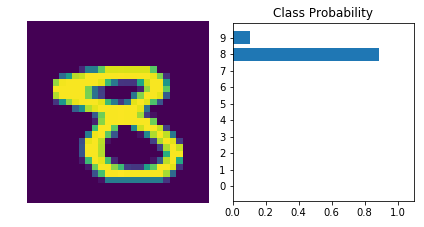

In [19]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps = model.forward(img)
    
ps = F.softmax(logps, dim = 1)
helper.view_classify(img.view(1, 28, 28), ps)